In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from kernel_pca import KernelPCA
from sklearn.svm import LinearSVC
from PIL import Image

(1797, 64) (1797,)


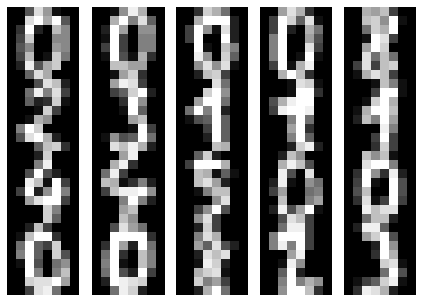

In [2]:
def getData(name):
    if name == 'olivetti':
        X, y =  fetch_olivetti_faces(return_X_y=True)
        img_size = 64
        pca_dims = [10, 25, 50, 100, 300]
    elif name == 'digits':
        X, y = load_digits(return_X_y=True)
        img_size = 8
        pca_dims = [5, 10, 25, 40, 64]
    else:
        print('Error: olivetti or digits dataset is only supported')
        return None
    
    print(X.shape, y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=0)
    
    fig, axs = plt.subplots(4, 5)
    for i in range(20):
        ax = axs[i//5, i%5]
        ax.imshow(X[10*i].reshape((img_size, img_size)), cmap='gray')
        ax.axis('off')
    plt.tight_layout(pad=0)

    return pca_dims, img_size, X_train, X_test, y_train, y_test

pca_dims, img_size, X_train, X_test, y_train, y_test = getData('digits')

In [3]:
def score(model):
    # leave one out strategy
    model.fit(X_train, y_train)
    return {
        'train_acc' : model.score(X_train, y_train),
        'test_acc'  : model.score(X_test, y_test)
    }

In [4]:
errors = pd.DataFrame()

print("Direct PCA")
for dims in pca_dims:
    pca = Pipeline([
        ('pca', KernelPCA(dims, kernel='None')),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    errors = errors.append(score(pca), ignore_index=True)
    
errors['dims'] = pca_dims
errors['dims train_acc test_acc'.split()]

Direct PCA


,dims,train_acc,test_acc
0,5,1.0,0.900000
1,10,1.0,0.977778
2,25,1.0,0.972222
3,40,1.0,0.975000
4,64,1.0,0.938889


In [5]:
errors = pd.DataFrame()

print("Kernel PCA with quadratic kernel")
for dims in pca_dims:
    pca = Pipeline([
        ('pca', KernelPCA(dims, kernel='poly', deg=2)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    errors = errors.append(score(pca), ignore_index=True)
    
errors['dims'] = pca_dims
errors['dims train_acc test_acc'.split()]

Kernel PCA with quadratic kernel


,dims,train_acc,test_acc
0,5,1.0,0.855556
1,10,1.0,0.963889
2,25,1.0,0.983333
3,40,1.0,0.980556
4,64,1.0,0.983333


In [6]:
errors = pd.DataFrame()

print("Kernel PCA with cubic kernel")
for dims in pca_dims:
    pca = Pipeline([
        ('pca', KernelPCA(dims, kernel='poly', deg=3)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    errors = errors.append(score(pca), ignore_index=True)
    
errors['dims'] = pca_dims
errors['dims train_acc test_acc'.split()]

Kernel PCA with cubic kernel


,dims,train_acc,test_acc
0,5,1.0,0.863889
1,10,1.0,0.961111
2,25,1.0,0.972222
3,40,1.0,0.983333
4,64,1.0,0.988889


In [7]:
errors = pd.DataFrame()

print("Kernel PCA with deg=4 kernel")
for dims in pca_dims:
    pca = Pipeline([
        ('pca', KernelPCA(dims, kernel='poly', deg=4)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    errors = errors.append(score(pca), ignore_index=True)
    
errors['dims'] = pca_dims
errors['dims train_acc test_acc'.split()]

Kernel PCA with deg=4 kernel


,dims,train_acc,test_acc
0,5,1.0,0.847222
1,10,1.0,0.963889
2,25,1.0,0.966667
3,40,1.0,0.972222
4,64,1.0,0.969444


In [8]:
errors = pd.DataFrame()

print("Kernel PCA with RBF 5 kernel")
for dims in pca_dims:
    pca = Pipeline([
        ('pca', KernelPCA(dims, kernel='rbf', gamma=5)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    errors = errors.append(score(pca), ignore_index=True)
    
errors['dims'] = pca_dims
errors['dims train_acc test_acc'.split()]

Kernel PCA with RBF 5 kernel


,dims,train_acc,test_acc
0,5,1.0,0.1
1,10,1.0,0.1
2,25,1.0,0.1
3,40,1.0,0.1
4,64,1.0,0.1


In [9]:
errors = pd.DataFrame()

print("Kernel PCA with RBF 1e-3 kernel")
for dims in pca_dims:
    pca = Pipeline([
        ('pca', KernelPCA(dims, kernel='rbf', gamma=1e-3)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
    errors = errors.append(score(pca), ignore_index=True)
    
errors['dims'] = pca_dims
errors['dims train_acc test_acc'.split()]

Kernel PCA with RBF 1e-3 kernel


,dims,train_acc,test_acc
0,5,1.0,0.863889
1,10,1.0,0.958333
2,25,1.0,0.977778
3,40,1.0,0.986111
4,64,1.0,0.986111


                  Direct PCA EigenDigits


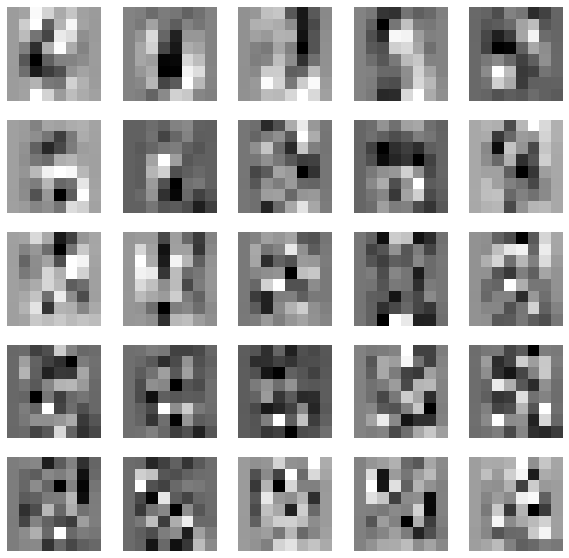

In [10]:
model1 = Pipeline([
        ('pca', KernelPCA(25, kernel='None')),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
score(model1)

V = model1.steps[0][1].transform(np.eye(img_size*img_size))
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i in range(25):
    ax = axs[i//5, i%5]
    ax.imshow(V.T[i].reshape((img_size, img_size)), cmap='gray_r')
    ax.axis('off')
print("                  Direct PCA EigenDigits")

          Polynomial(deg=2) Kernel PCA EigenDigits


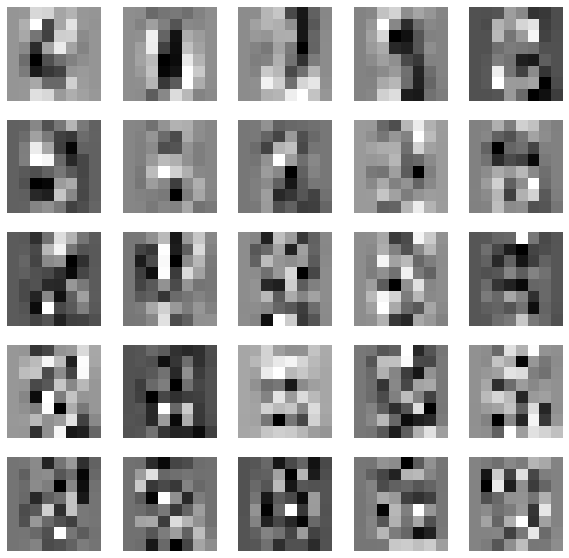

In [11]:
model2 = Pipeline([
        ('pca', KernelPCA(25, kernel='poly', deg=2)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
score(model2)

V = model2.steps[0][1].transform(np.eye(img_size*img_size))
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i in range(25):
    ax = axs[i//5, i%5]
    ax.imshow(V.T[i].reshape((img_size, img_size)), cmap='gray_r')
    ax.axis('off')

print("          Polynomial(deg=2) Kernel PCA EigenDigits")

           RBF(gamma=0.001)Kernel PCA EigenDigits


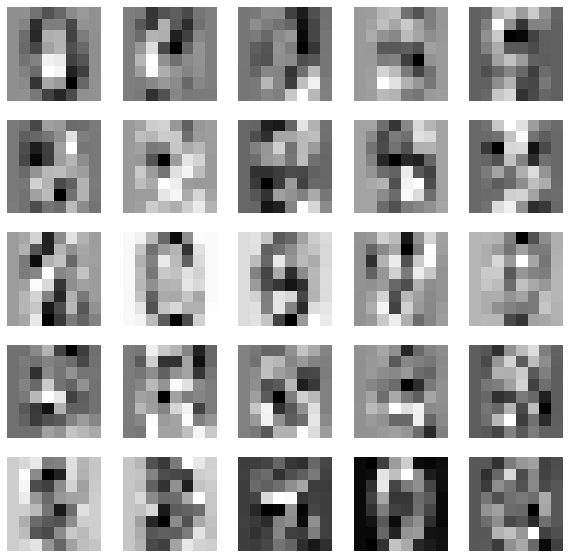

In [12]:
model3 = Pipeline([
        ('pca', KernelPCA(25, kernel='rbf', gamma=1e-3)),
        ('scalar', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ])
score(model3)

V = model3.steps[0][1].transform(np.eye(img_size * img_size))
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i in range(25):
    ax = axs[i//5, i%5]
    ax.imshow(V.T[i].reshape((img_size, img_size)), cmap='gray_r')
    ax.axis('off')

print("           RBF(gamma=0.001)Kernel PCA EigenDigits")

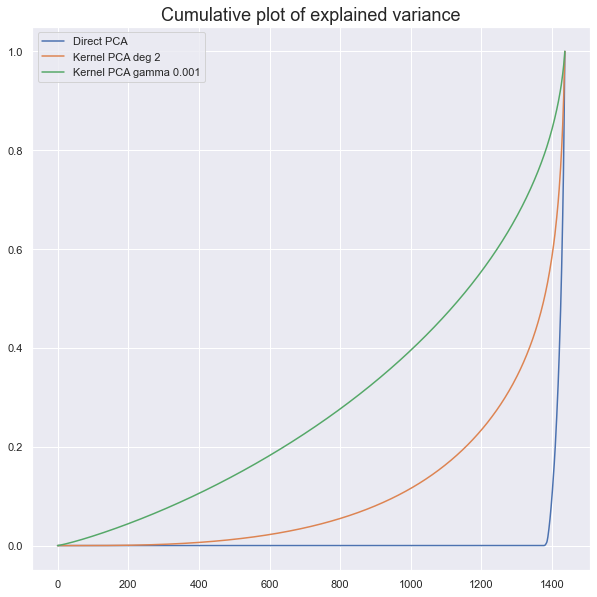

In [13]:
plt.figure(figsize=(10,10))
d = np.diagonal(model1.steps[0][1].D)[::-1]
plt.plot(d.cumsum()/d.sum(), label='Direct PCA')

d = np.diagonal(model2.steps[0][1].D)[::-1]
plt.plot(d.cumsum()/d.sum(), label='Kernel PCA deg 2')

d = np.diagonal(model3.steps[0][1].D)[::-1]
plt.plot(d.cumsum()/d.sum(), label='Kernel PCA gamma 0.001')

plt.title("Cumulative plot of explained variance", fontsize=18)
plt.legend();